In [1]:
import os # imports the os library to enable the kernel to intract with OS functions such as file retrieval
#print(os.getcwd())# This inidactes the current working directory

os.chdir("D:\\Datasets") #Here we are setting the current working directory as assigning the path where the excle file is stored
print (os.getcwd())#Displaying the newly set working directory

D:\Datasets


In [2]:
import pandas as pd #importing pandas libarary that allow data to be organised in a tabular strucure

Orders = pd.read_excel (r'Sample_Superstore.xls', sheet_name='Orders')#importing a worksheet named orders from a workbook named sample_superstore
Returns = pd.read_excel (r'Sample_Superstore.xls', sheet_name='Returns')#importing a worksheet named Returns from a workbook named sample_superstore
People = pd.read_excel (r'Sample_Superstore.xls', sheet_name='People')#importing a worksheet people orders from a workbook named sample_superstore

In [3]:
Orders.head(5) #Displaying the first 5 rows of the worksheet orders

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2011-103800,2013-01-03,2013-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,1760,CA-2011-141817,2013-01-05,2013-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [4]:
Returns.head(5) #Displaying the first 5 rows of the worksheet Returns

,Returned,Order ID
0,Yes,CA-2014-153822
1,Yes,CA-2014-129707
2,Yes,CA-2011-152345
3,Yes,CA-2012-156440
4,Yes,US-2014-155999


In [5]:
People.head(5) #Displaying the first 5 rows of the worksheet head

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


In [6]:
Total_profit=Orders.pivot_table (index='Category',  values='Profit', aggfunc='sum') #creating a pivot table/summary table to show the total profits for each category
print(Total_profit)

                      Profit
Category                    
Furniture         18451.2728
Office Supplies  122490.8008
Technology       145454.9481


In [7]:
Total_sales=Orders.pivot_table (index='Category',  values='Sales', aggfunc='sum')#creating a pivot table/summary table to show the total sales made for each category
print(Total_sales)

                       Sales
Category                    
Furniture        741999.7953
Office Supplies  719047.0320
Technology       836154.0330


In [8]:
Finance = pd.merge (Total_profit, Total_sales, left_on='Category', right_on= 'Category') #Creating a new dataframe that combines the results from the two pivot tables created above
print(Finance)

                      Profit        Sales
Category                                 
Furniture         18451.2728  741999.7953
Office Supplies  122490.8008  719047.0320
Technology       145454.9481  836154.0330


In [9]:
Finance['profit_ratio']=Finance['Profit']/Finance['Sales']#adding a new column to the finance dataframe created above.The new added column is obtained by dividing profit by sales
print (Finance)

                      Profit        Sales  profit_ratio
Category                                               
Furniture         18451.2728  741999.7953      0.024867
Office Supplies  122490.8008  719047.0320      0.170352
Technology       145454.9481  836154.0330      0.173957


In [10]:
Finance.sort_values(by=['profit_ratio'], inplace=False, ascending=False)#Sorting the finance dataframe by profit ratio column and descending order

,Profit,Sales,profit_ratio
Category,,,
Technology,145454.9481,836154.0330,0.173957
Office Supplies,122490.8008,719047.0320,0.170352
Furniture,18451.2728,741999.7953,0.024867


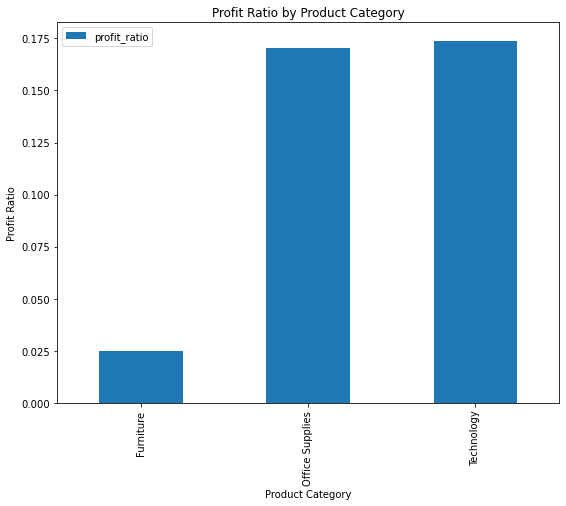

In [11]:
import matplotlib.pyplot as plt #importing the graphical visualization library

Finance.pivot_table (index='Category',  values='profit_ratio', observed=False).plot(kind='bar', figsize=(9,7))# visualizang the profit ratio by each category by using comperative bar graph

plt.xlabel('Product Category') #Naming the x axis

plt.ylabel('Profit Ratio') #Naming the y axis

plt.title('Profit Ratio by Product Category') #Giving the barplot a title

plt.legend(loc='upper left') #defining the location of the legend

plt.show() #displaying the plot

In [12]:
Orders.info()# displaying the column/variable  properties of the already imported orders worksheet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [13]:
Orders['Delivery_time']=Orders['Ship Date']-Orders['Order Date'] #adding a new column named Delivery_time into the orders worksheet.
#The values of the  new column are obtainedd by getting the difference between ship date and order date 
print (Orders)#Displaying the new dataframe after Deliverytime column has been added.Onlt the first 5 and last 5 rows are displayed

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0       7981  CA-2011-103800 2013-01-03 2013-01-07  Standard Class   
1        740  CA-2011-112326 2013-01-04 2013-01-08  Standard Class   
2        741  CA-2011-112326 2013-01-04 2013-01-08  Standard Class   
3        742  CA-2011-112326 2013-01-04 2013-01-08  Standard Class   
4       1760  CA-2011-141817 2013-01-05 2013-01-12  Standard Class   
...      ...             ...        ...        ...             ...   
9989     908  CA-2014-143259 2016-12-30 2017-01-03  Standard Class   
9990     909  CA-2014-143259 2016-12-30 2017-01-03  Standard Class   
9991    1297  CA-2014-115427 2016-12-30 2017-01-03  Standard Class   
9992    1298  CA-2014-115427 2016-12-30 2017-01-03  Standard Class   
9993    5092  CA-2014-156720 2016-12-30 2017-01-03  Standard Class   

     Customer ID      Customer Name      Segment        Country  \
0       DP-13000      Darren Powers     Consumer  United States   
1       PO-19195      Phi

In [14]:
Orders.info()# Dispaling the new column properties of the updated orders worksheet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Row ID         9994 non-null   int64          
 1   Order ID       9994 non-null   object         
 2   Order Date     9994 non-null   datetime64[ns] 
 3   Ship Date      9994 non-null   datetime64[ns] 
 4   Ship Mode      9994 non-null   object         
 5   Customer ID    9994 non-null   object         
 6   Customer Name  9994 non-null   object         
 7   Segment        9994 non-null   object         
 8   Country        9994 non-null   object         
 9   City           9994 non-null   object         
 10  State          9994 non-null   object         
 11  Postal Code    9994 non-null   int64          
 12  Region         9994 non-null   object         
 13  Product ID     9994 non-null   object         
 14  Category       9994 non-null   object         
 15  Sub-

In [15]:
Orders['Delivery_time_in_days'] = Orders['Delivery_time'].astype(str).str[:-24]#adding a new column that converts the divelry time in days from series to strind data type
Orders.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Delivery_time,Delivery_time_in_days
0,7981,CA-2011-103800,2013-01-03,2013-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,4 days,
1,740,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,4 days,
2,741,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,4 days,
3,742,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,4 days,
4,1760,CA-2011-141817,2013-01-05,2013-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,7 days,


In [16]:
Delivery_time_num = pd.to_numeric(Orders.Delivery_time_in_days) #Converting the values of the column delivery time from string to integers
print(Delivery_time_num)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9989   NaN
9990   NaN
9991   NaN
9992   NaN
9993   NaN
Name: Delivery_time_in_days, Length: 9994, dtype: float64


In [17]:
Orders.insert (2, "Delivery_time_num", Delivery_time_num)#adding a new value=delivery_time_num in the second row and the column name Delivery_time_num
Orders.head(5)

,Row ID,Order ID,Delivery_time_num,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Delivery_time,Delivery_time_in_days
0,7981,CA-2011-103800,NaN,2013-01-03,2013-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,...,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,4 days,
1,740,CA-2011-112326,NaN,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,4 days,
2,741,CA-2011-112326,NaN,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,4 days,
3,742,CA-2011-112326,NaN,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,4 days,
4,1760,CA-2011-141817,NaN,2013-01-05,2013-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,...,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,7 days,


In [18]:
Process=Orders.pivot_table (index='State',  values='Delivery_time_num', aggfunc='mean') #declaring a new variable and assiging  the mean of delivery_time_num to it
print(Process)

Empty DataFrame
Columns: []
Index: []


In [19]:
Process.sort_values(by=['Delivery_time_num'], inplace=False, ascending=True) #Sorting the contents of the already declared variable process in ascending order

KeyError: 'Delivery_time_num'

In [20]:
Process.pivot_table (index='State',  values='Delivery_time_num', observed=False).plot(kind='bar', figsize=(9,7))# cteating a pivot table from process based on state column and plotting a bar graph

plt.xlabel('State') #Naming the x axis

plt.ylabel('Delivery Time') #Naming the y axis

plt.title('Delivery Time by State') #Giving the plot a title

plt.legend(loc='upper right') #Defining the location of the legend

plt.show() #Dispaying the plot

KeyError: 'Delivery_time_num'

In [21]:
Return_order = pd.merge (Returns, Orders, left_on='Order ID', right_on= 'Order ID', how='right')#merging the two worksheets returns,
# and orders by order_ID column
print(Return_order)#Printing the merged dataframe

     Returned        Order ID  Row ID  Delivery_time_num Order Date  \
0         NaN  CA-2011-103800    7981                NaN 2013-01-03   
1         NaN  CA-2011-112326     740                NaN 2013-01-04   
2         NaN  CA-2011-112326     741                NaN 2013-01-04   
3         NaN  CA-2011-112326     742                NaN 2013-01-04   
4         NaN  CA-2011-141817    1760                NaN 2013-01-05   
...       ...             ...     ...                ...        ...   
9989      NaN  CA-2014-143259     908                NaN 2016-12-30   
9990      NaN  CA-2014-143259     909                NaN 2016-12-30   
9991      Yes  CA-2014-115427    1297                NaN 2016-12-30   
9992      Yes  CA-2014-115427    1298                NaN 2016-12-30   
9993      NaN  CA-2014-156720    5092                NaN 2016-12-30   

      Ship Date       Ship Mode Customer ID      Customer Name      Segment  \
0    2013-01-07  Standard Class    DP-13000      Darren Powers     C

In [22]:
Return_dummy=[] #Declaring an empty list
for row in Return_order.Returned: #initializing a for loop to iterate through all values of  the column Returned 
    if row=="Yes": Return_dummy.append('1')# if the value found at each iteration is true then a 1 should be added in the declared string Return dummy 
    else: Return_dummy.append('0')#if the value found at each iteration is not "Yes" then update the value in the Return dummy list to 0
        
print(Return_dummy) #Display the contents return dummy variable

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [23]:
Return_dummy_num = pd.to_numeric(Return_dummy)#Convert the contents of the return_dummy_num from string to numeric
print(Return_dummy_num)

[0 0 0 ... 1 1 0]


In [ ]:
Return_order.insert (2, "Return Dummy", Return_dummy_num)#insert a new value in the second row where column is "Return dummy"
Return_order.head(5) #print(the first 5 rows of the updated datframee)

In [ ]:
Customers_returns=Return_order.pivot_table (index='Region',  values='Return Dummy', aggfunc='sum') #Geberate a new pivot table grouped by region and summed by total of return dummy
print(Customers_returns)

In [ ]:
Customers_orders=Return_order.pivot_table (index='Region',  values='Order ID', aggfunc='count') #Generate a new pivot table grouped by regioned and the total number of each order IDs
print(Customers_orders)

In [ ]:
Customers = pd.merge (Customers_returns, Customers_orders, left_on='Region', right_on= 'Region') #Combining two variables by joining column= Region into a new dataframe callled  customers
print(Customers)

In [ ]:
Customers['Return rate']=Customers['Return Dummy']/Customers['Order ID']# Adding a new calculated column into customers dataframe
print(Customers)

In [ ]:
Customers.pivot_table (index='Region',  values='Return rate', observed=False).plot(kind='bar', figsize=(9,7))#Generating a bar graph from  a ppivot table grouped by Region 

plt.xlabel('Region')

plt.ylabel('Return Rate')

plt.title('Return Rate by Region')

plt.legend(loc='upper left')

plt.show()

In [ ]:
Order_people = pd.merge (Orders, People, left_on='Region', right_on= 'Region') # Merging the two worksheets orders and people by Region column and storing that into a new dataframe called  order_people
print(Order_people)

In [ ]:
import datetime as dt

Month = Order_people['Order Date'].dt.month# Displaying the name of the month the order was recorded
print (Month)

In [ ]:
Year = Order_people['Order Date'].dt.year #Displaying the name of the year the order was recorded
print (Year)

In [ ]:
Order_people.insert (2, "Month", Month) #inserting a new value into order people column in the second row and column= Month
Order_people.insert (2, "Year", Year)#inserting a new value into order people column in the second row and column= Year
Order_people.head(5)

In [ ]:
Employees=Order_people.pivot_table (index=['Year', 'Month', 'Person'],  values='Sales', aggfunc='sum') #Generating a pivot table grpouped 
#by Year,month and person and by the total value of sales for each specific
print(Employees)

In [ ]:
Max=Employees.groupby(['Year', 'Month'])['Sales'].transform(max) #Generating a grouped dataframe called max where employees are grouped by maximum number of sales for each month and year
print(Max)

In [ ]:
Top_performers = pd.merge (Employees, Max, left_on=['Year', 'Month', 'Person', 'Sales'], right_on= ['Year', 'Month', 'Person', 'Sales'])
# merging the two dataframes, employees and Max by using the merging columns as Year,month,person,sales
print(Top_performers)